**Author**: Moch Nabil Farras Dhiya (10120034)

**E-mail**: nabilfarras923@gmail.com

-------------------

**Disclaimer**: The **dataset** used in this analysis is a public dataset retrieved from [Customer Personality Analysis - Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount).

# Background

## Attributes

**People**

*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**


*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue
*   NumWebVisitsMonth: Number of visits to company’s website in the last month
*   NumStorePurchases: Number of purchases made directly in stores

## Goals

Perform clustering to summarize customer segments.

# Connect to Google Drive

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
%cd /content/gdrive/My Drive/Portfolio/Data Science/Python/Customer Segmentation/CSV

/content/gdrive/My Drive/Portfolio/Data Science/Python/Customer Segmentation/CSV


# Import Packages

In [47]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from statistics import mean
from scipy.stats import skew

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict

# Import Data

In [48]:
data = pd.read_csv("final_data.csv")
cluster = pd.read_csv("cluster_data.csv")

In [49]:
data = pd.merge(data, cluster, how = 'inner', on = 'ID')
data

,Unnamed: 0_x,ID,Age,Education_x,Marital_Status_x,Income,Kidhome_x,Teenhome_x,Duration_Customer,Frequency,...,Kidhome_y,Teenhome_y,Recency_Cluster,Frequency_Cluster,Wines_Cluster,Fruits_Cluster,Meat_Cluster,Fish_Cluster,Sweets_Cluster,Gold_Cluster
0,0,5524,66,1,0,58138.0,0,0,3860,32,...,0,0,1,2,1,1,2,2,1,1
1,1,2174,69,1,0,46344.0,1,1,3310,11,...,1,1,1,0,0,0,0,0,0,0
2,2,4141,58,1,1,71613.0,0,0,3509,25,...,0,0,0,1,1,1,0,1,0,0
3,3,6182,39,1,1,26646.0,1,0,3336,14,...,1,0,0,0,0,0,0,0,0,0
4,4,5324,42,3,1,58293.0,1,0,3358,24,...,1,0,2,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2235,10870,56,1,1,61223.0,0,1,3578,23,...,0,1,1,1,1,1,0,0,2,2
2208,2236,4001,77,3,1,64014.0,2,1,3216,29,...,2,1,1,2,1,0,0,0,0,0
2209,2237,7270,42,1,0,56981.0,0,0,3352,25,...,0,0,2,1,2,1,1,0,0,0
2210,2238,8235,67,2,1,69245.0,0,1,3353,26,...,0,1,0,1,1,0,1,1,0,1


# Analysis

## Discount

### Wines

In [50]:
data.groupby('Wines_Cluster')['ID'].count()

Wines_Cluster
0    1303
1     603
2     306
Name: ID, dtype: int64

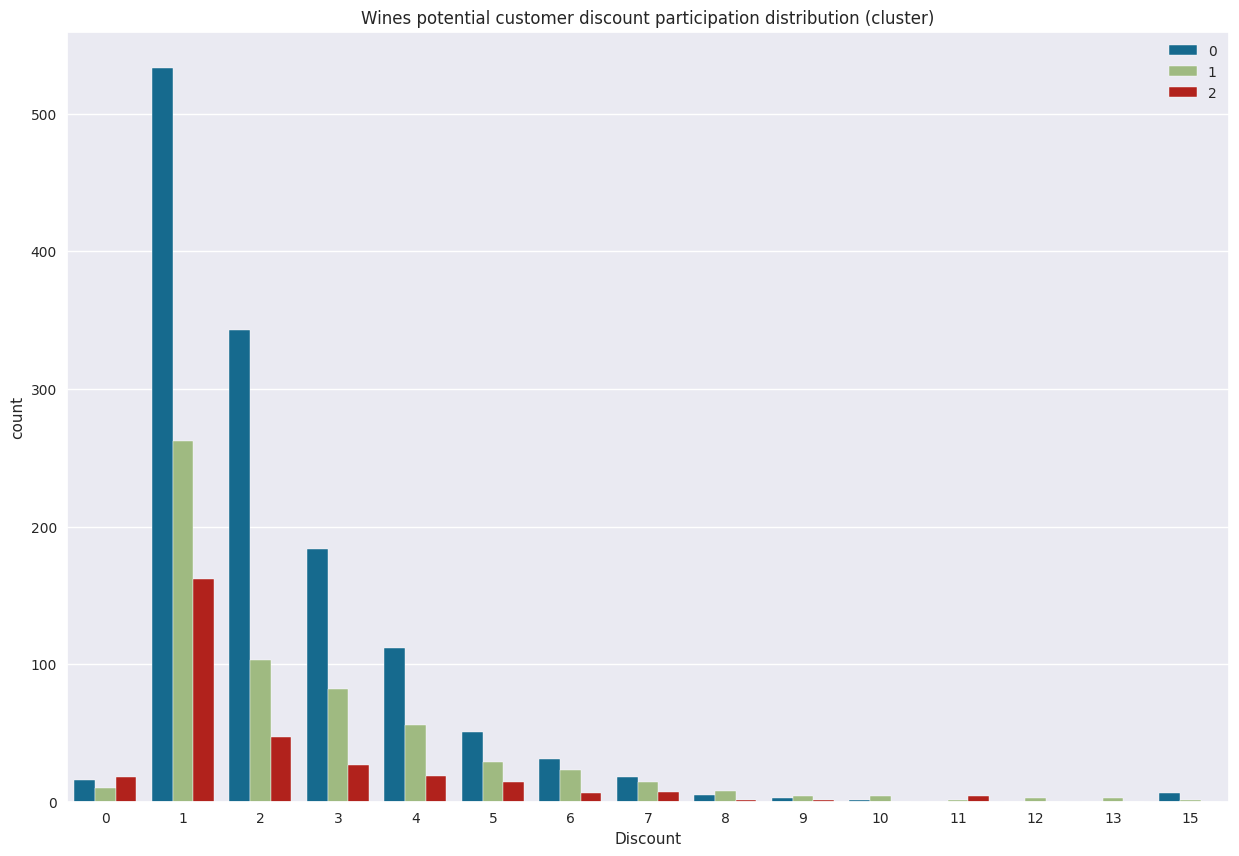

In [51]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Wines_Cluster')
plt.title('Wines potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Fruits

In [52]:
data.groupby('Fruits_Cluster')['ID'].count()

Fruits_Cluster
0    1642
1     387
2     183
Name: ID, dtype: int64

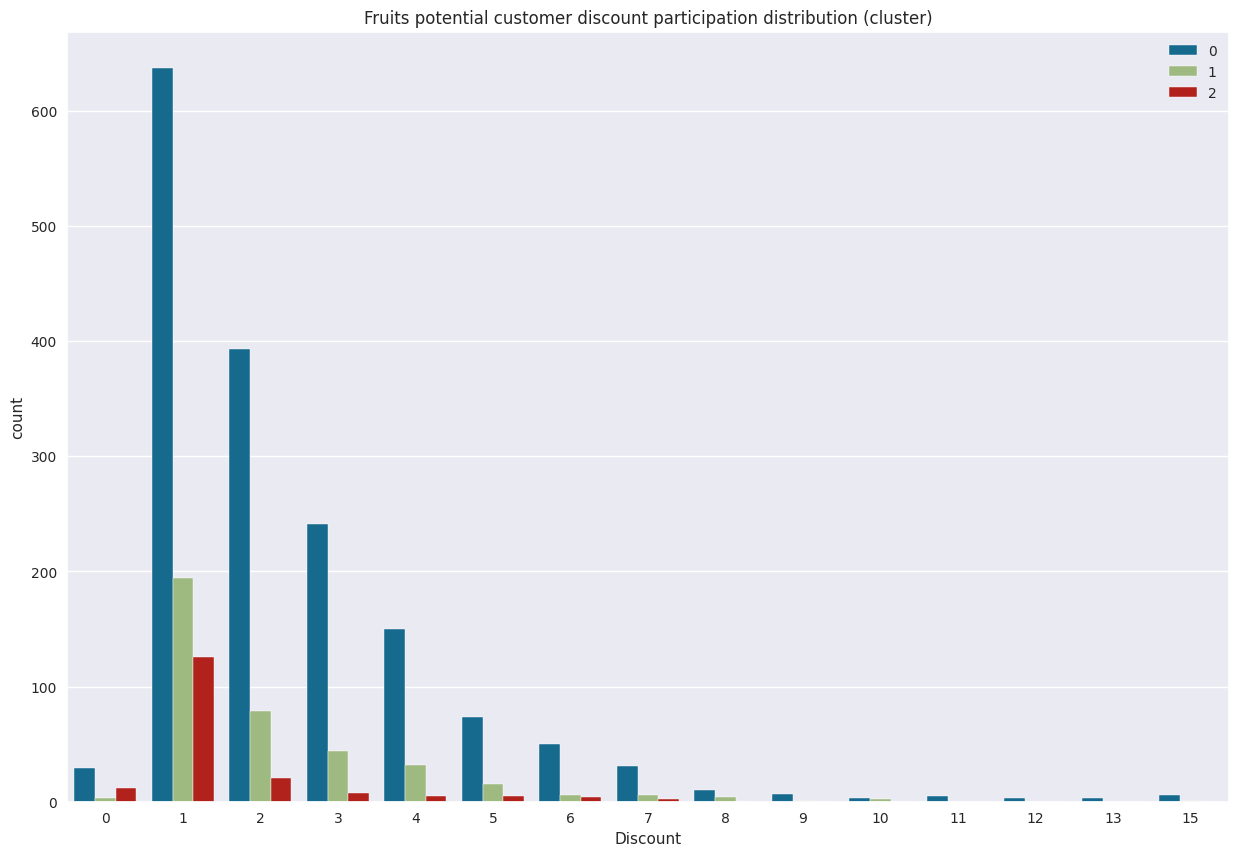

In [53]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Fruits_Cluster')
plt.title('Fruits potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Meat

In [54]:
data.groupby('Meat_Cluster')['ID'].count()

Meat_Cluster
0    1577
1     437
2     198
Name: ID, dtype: int64

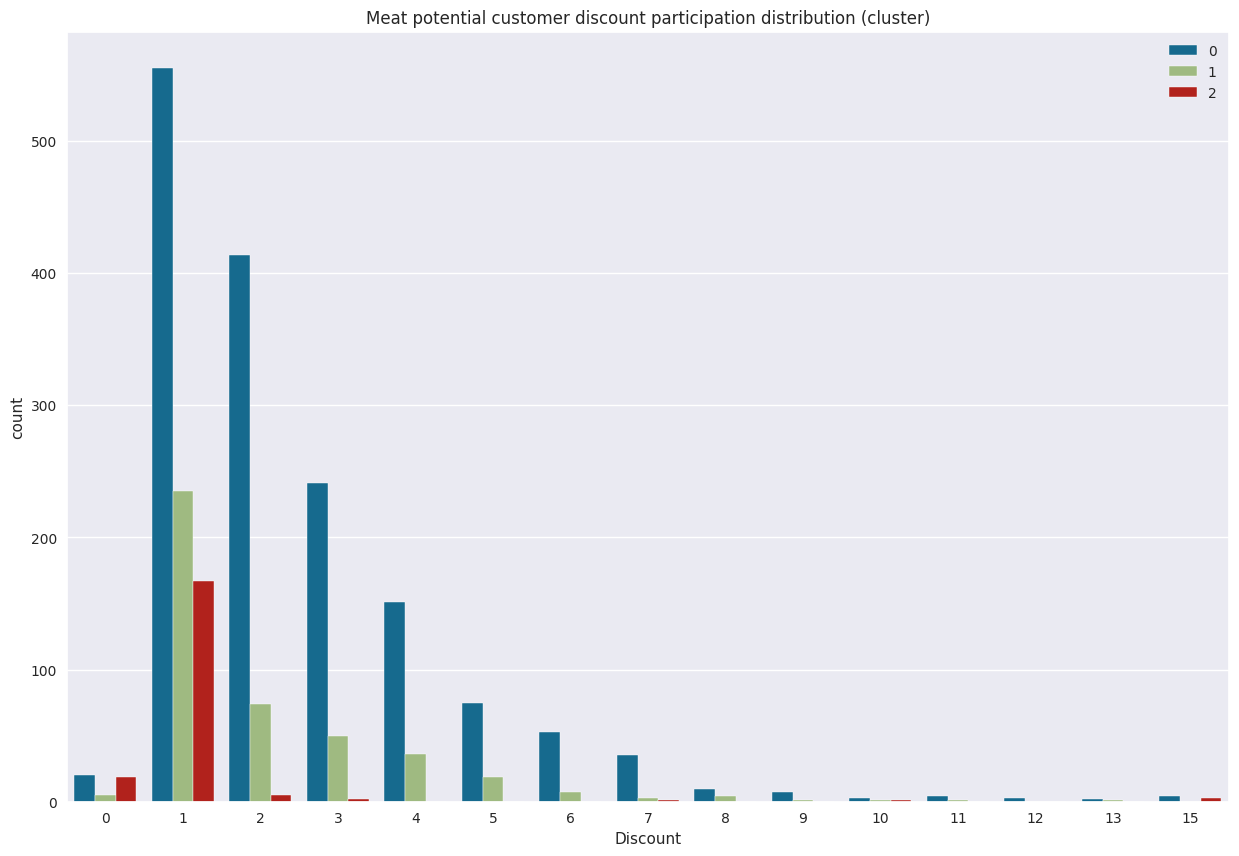

In [55]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Meat_Cluster')
plt.title('Meat potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Fish

In [56]:
data.groupby('Fish_Cluster')['ID'].count()

Fish_Cluster
0    1620
1     386
2     206
Name: ID, dtype: int64

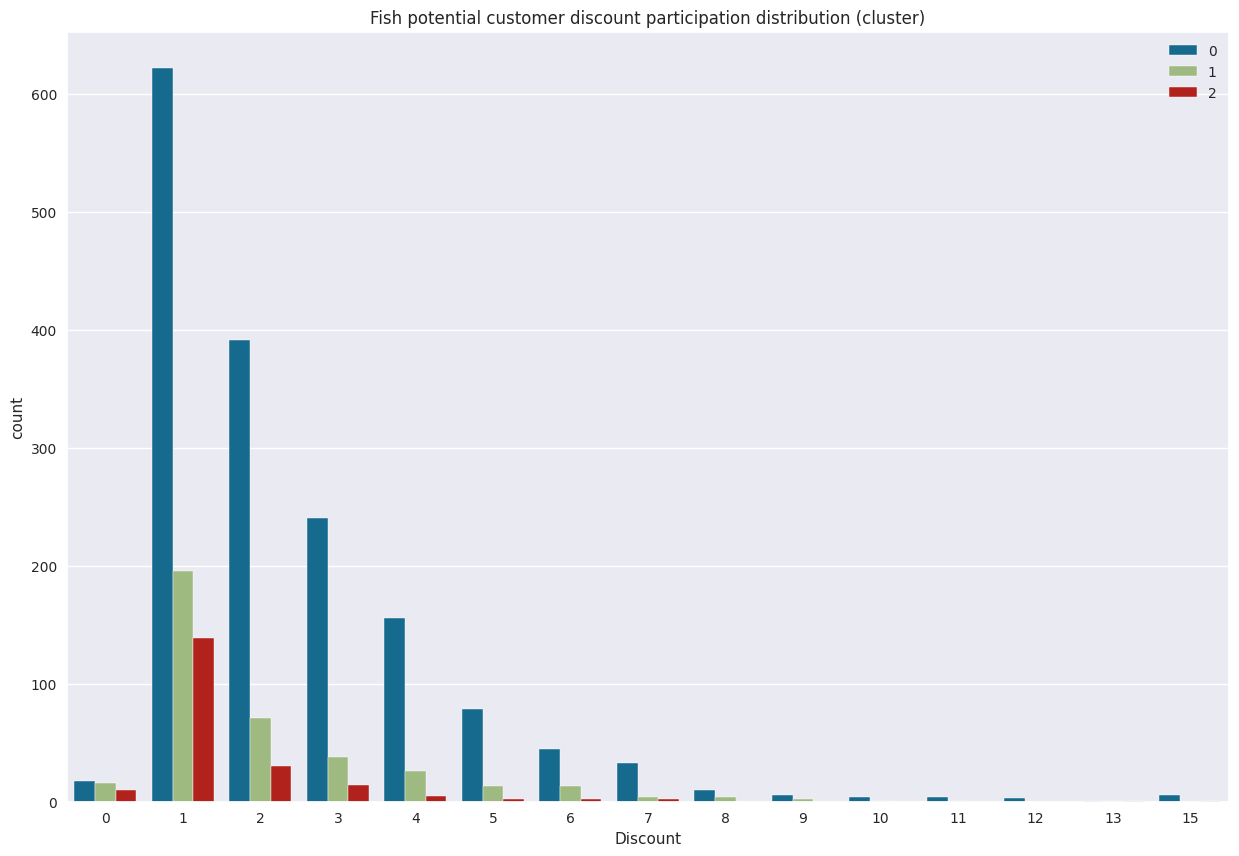

In [57]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Fish_Cluster')
plt.title('Fish potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Sweets

In [58]:
data.groupby('Sweets_Cluster')['ID'].count()

Sweets_Cluster
0    1660
1     373
2     179
Name: ID, dtype: int64

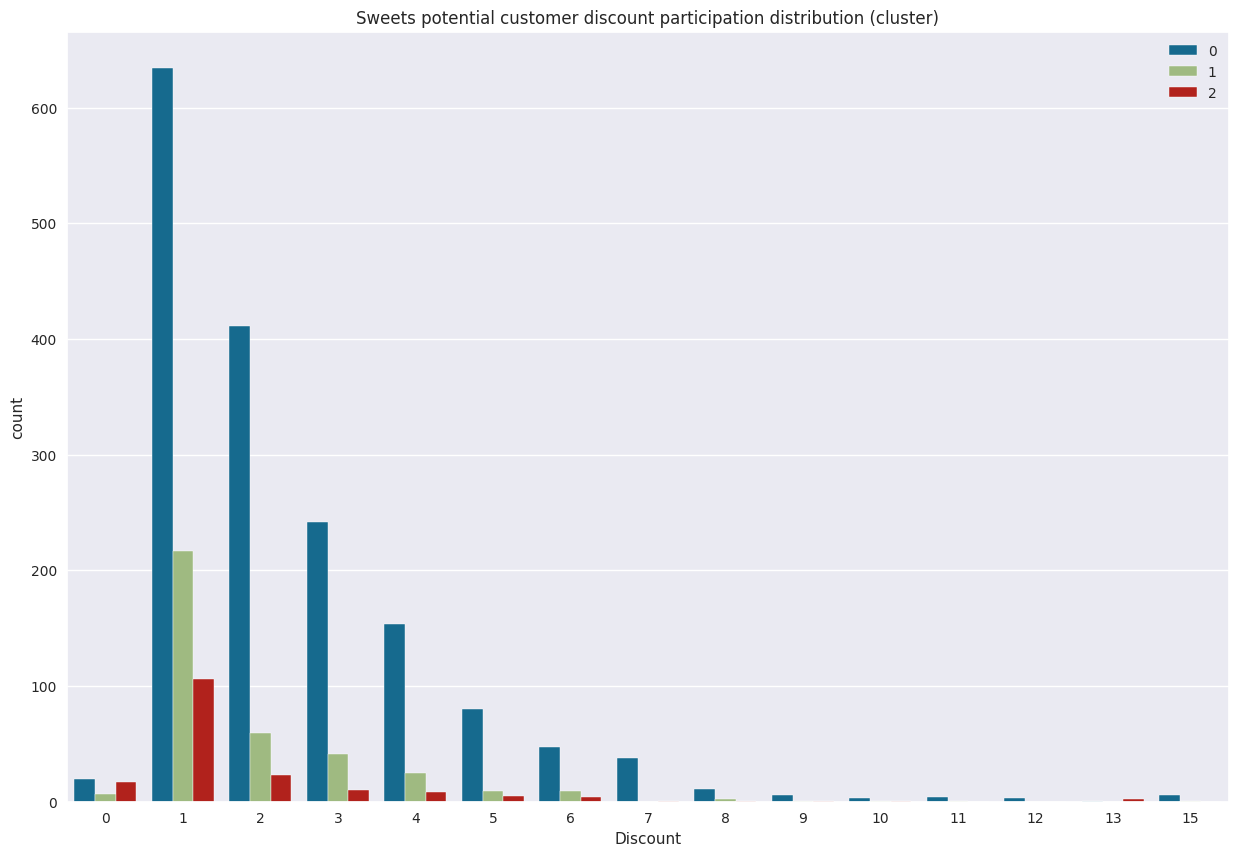

In [59]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Sweets_Cluster')
plt.title('Sweets potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Gold

In [60]:
data.groupby('Gold_Cluster')['ID'].count()

Gold_Cluster
0    1579
1     430
2     203
Name: ID, dtype: int64

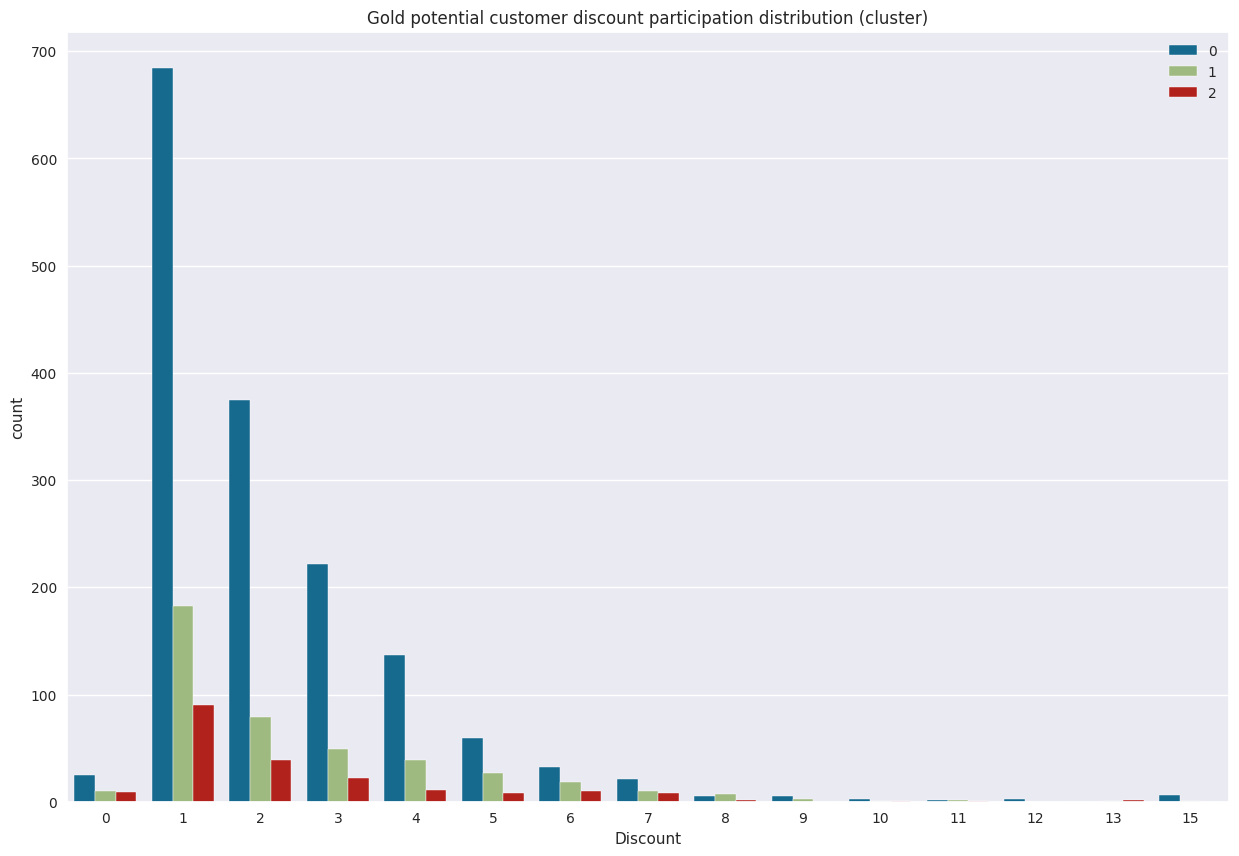

In [61]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Gold_Cluster')
plt.title('Gold potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

## Media

We will see potential buyers' media preference on buying products by counting the percentage of customers who use certain media more than once.

### Wines

In [62]:
# Web

100 * len(data[(data['Wines_Cluster'] == 2) |
               (data['Wines_Cluster'] == 3) & 
               (data['Web'] > 1)]) / len(data[(data['Wines_Cluster'] == 2) | 
                                              (data['Wines_Cluster'] == 3)])

100.0

In [63]:
# Catalogue

100 * len(data[(data['Wines_Cluster'] == 2) | 
               (data['Wines_Cluster'] == 3) & 
               (data['Catalog'] > 1)]) / len(data[(data['Wines_Cluster'] == 2) | 
                                                  (data['Wines_Cluster'] == 3)])

100.0

In [64]:
# Store

100 * len(data[(data['Wines_Cluster'] == 2) | 
               (data['Wines_Cluster'] == 3) & 
               (data['Store'] > 1)]) / len(data[(data['Wines_Cluster'] == 2) | 
                                                (data['Wines_Cluster'] == 3)])

100.0

### Fruits

In [65]:
# Web

100 * len(data[(data['Fruits_Cluster'] == 0) & 
               (data['Web'] > 1)]) / len(data[(data['Fruits_Cluster'] == 0)])

76.12667478684531

In [66]:
# Catalogue

100 * len(data[(data['Fruits_Cluster'] == 0) &
               (data['Catalog'] > 1)]) / len(data[(data['Fruits_Cluster'] == 0)])

36.84531059683313

In [67]:
# Store

100 * len(data[(data['Fruits_Cluster'] == 0) & 
               (data['Store'] > 1)]) / len(data[(data['Fruits_Cluster'] == 0)])

98.78197320341047

### Meat

In [68]:
# Web

100*len(data[(data['Meat_Cluster'] == 0) & 
             (data['Web'] > 1)])/len(data[(data['Meat_Cluster'] == 0)])

75.33291058972733

In [69]:
# Catalogue

100 * len(data[(data['Meat_Cluster'] == 0) & 
               (data['Catalog'] > 1)]) / len(data[(data['Meat_Cluster'] == 0)])

33.03741280913126

In [70]:
# Store

100 * len(data[(data['Meat_Cluster'] == 0) & 
               (data['Store'] > 1)]) / len(data[(data['Meat_Cluster'] == 0)])

98.9854153455929

### Fish

In [71]:
# Web

100*len(data[(data['Fish_Cluster'] == 2) & 
             (data['Web'] > 1)]) / len(data[(data['Fish_Cluster'] == 2)])

100.0

In [72]:
# Catalogue

100 * len(data[(data['Fish_Cluster'] == 2) & 
               (data['Catalog'] > 1)]) / len(data[(data['Fish_Cluster'] == 2)])

98.05825242718447

In [73]:
# Store

100 * len(data[(data['Fish_Cluster'] == 2) & 
               (data['Store'] > 1)]) / len(data[(data['Fish_Cluster'] == 2)])

100.0

### Sweets

In [74]:
# Web

100 * len(data[(data['Sweets_Cluster'] == 2) & 
               (data['Web'] > 1)]) / len(data[(data['Sweets_Cluster'] == 2)])

100.0

In [75]:
# Catalogue

100 * len(data[(data['Sweets_Cluster'] == 2) & 
               (data['Catalog'] > 1)]) / len(data[(data['Sweets_Cluster'] == 2)])

98.88268156424581

In [76]:
# Store

100 * len(data[(data['Sweets_Cluster'] == 2) & 
               (data['Store'] > 1)]) / len(data[(data['Sweets_Cluster'] == 2)])

99.44134078212291

### Gold

In [77]:
# Web

100 * len(data[(data['Gold_Cluster'] == 0) & 
               (data['Web'] > 1)]) / len(data[(data['Gold_Cluster'] == 0)])

75.17416086130463

In [78]:
# Catalogue

100 * len(data[(data['Gold_Cluster'] == 0) & 
               (data['Catalog'] > 1)]) / len(data[(data['Gold_Cluster'] == 0)])

36.478784040531984

In [79]:
# Store

100 * len(data[(data['Gold_Cluster'] == 0) & 
               (data['Store'] > 1)]) / len(data[(data['Gold_Cluster'] == 0)])

98.92336922102596

## Campaign

In [80]:
data[['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             1754
                        1           0           0              129
                        0           1           0               83
                                    0           1               57
1           0           0           0           0               52
0           0           0           1           1               24
1           0           0           1           1               23
                                    0           1               21
                        1           0           1               13
                        0           1           0               12
                        1           0           0                8
            1           0           1           1                8
0           1           0           1           0                8
            0           1           0           1                6
   

In [81]:
len(data)

2212

### Wines

In [82]:
data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             118
                                                1              33
                                    1           0              29
1           0           0           0           0              19
0           0           1           0           0              18
                        0           1           1              17
1           0           0           1           1              17
                                    0           1              15
                        1           0           1              10
            1           0           1           1               6
0           1           0           1           0               5
1           0           0           1           0               5
0           1           0           1           1               4
            0           1           0           1               3
            1    

In [83]:
len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)])

306

### Fruits

In [84]:
data[(data['Fruits_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             1343
                        1           0           0              103
                        0           1           0               65
1           0           0           0           0               31
0           0           0           0           1               23
                                    1           1               18
1           0           0           1           1               11
                                                0                8
0           1           0           1           0                7
1           0           0           0           1                7
                        1           0           1                6
            1           0           1           1                5
0           1           0           1           1                4
1           0           1           0           0                2
   

In [85]:
len(data[(data['Fruits_Cluster'] == 0)])

1642

### Meat

In [86]:
data[(data['Meat_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             1347
                        1           0           0              103
                        0           1           0               66
1           0           0           0           0               12
0           0           0           1           1                7
1           0           0           0           1                7
                                    1           0                7
0           1           0           1           0                6
            0           0           0           1                6
1           0           1           0           1                2
            1           0           1           1                2
0           1           0           1           1                2
                        1           0           0                2
1           0           0           1           1                2
   

In [87]:
len(data[(data['Meat_Cluster'] == 0)])

1577

### Fish

In [88]:
data[(data['Fish_Cluster'] == 2)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             135
1           0           0           0           0              17
0           0           0           0           1              13
                        1           0           0               9
1           0           0           0           1               8
0           0           0           1           0               5
1           0           0           1           1               5
                        1           0           0               5
                                                1               4
                        0           1           0               3
0           0           0           1           1               1
1           1           0           1           0               1
dtype: int64

In [89]:
len(data[(data['Fish_Cluster'] == 2)])

206

### Sweets

In [90]:
data[(data['Sweets_Cluster'] == 2)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             113
                                                1              18
1           0           0           0           0              11
                                                1               6
                                    1           1               6
                        1           0           1               6
0           0           0           1           0               5
                        1           0           0               3
                                                1               3
1           0           1           0           0               3
                        0           1           0               2
            1           0           1           1               2
0           0           0           1           1               1
dtype: int64

In [91]:
len(data[(data['Sweets_Cluster'] == 2)])

179

### Gold

In [92]:
data[(data['Gold_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             1307
                        1           0           0               88
                        0           1           0               63
1           0           0           0           0               25
0           0           0           0           1               24
                                    1           1               17
1           0           0           0           1               13
                                    1           1               12
                                                0                6
0           1           0           1           0                5
1           1           0           1           1                5
            0           1           0           1                4
                                                0                3
0           1           1           0           0                2
1  

In [93]:
len(data[(data['Gold_Cluster'] == 0)])

1579

# Summary & Recommendations

## Summary



1.   The **most popular** platform for potential customers are **store**, **web**, and **catalogue**, respectively.
2.   Overall, the **discount participation rate** is **very low** (including the potential customers for each product'). Perhaps the discount given is **not tempting** for the customers? 
3.   Even so, it seems like for **potential customers** (Cluster 2), their discount **participation rate** is very high, mostly **higher than 50%** (for fruits, meat, and fish products, it exceeds 75%).
4.   The potential buyers' campaign participation rate are also very low (most are not participating even once)



## Recommendations



1.   The company should **upgrade** their **website**, as many potential customers are buying products
through website, and also as a mean to attract another customer segments.
2.   There needs to be a **promo** to attract buyers, especially the potential customers, so the amount of sold products will increase. 
3.   There needs to be a **better campaign strategy** on catching the attention for these customers, as we previously known that these customers are at least an Undergraduate, so they might be busy with work and do not have time on participating in the Campaign.

